In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dados/RH-DATASET.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df['EmployeeCount'].unique()

array([1])

In [10]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

In [12]:
df[['JobLevel', 'JobRole']].head()

,JobLevel,JobRole
0,2,Sales Executive
1,2,Research Scientist
2,1,Laboratory Technician
3,1,Research Scientist
4,1,Laboratory Technician


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df_filtered = df[['EmployeeNumber','Age','Attrition','Department','Education',
                  'EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel', 'JobRole',
                  'JobSatisfaction','MonthlyIncome','RelationshipSatisfaction','YearsAtCompany',
                  'YearsInCurrentRole','YearsWithCurrManager']]

In [4]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   object
 3   Department                1470 non-null   object
 4   Education                 1470 non-null   int64 
 5   EducationField            1470 non-null   object
 6   EnvironmentSatisfaction   1470 non-null   int64 
 7   Gender                    1470 non-null   object
 8   JobInvolvement            1470 non-null   int64 
 9   JobLevel                  1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MonthlyIncome             1470 non-null   int64 
 13  RelationshipSatisfaction  1470 non-null   int64 
 14  YearsAtCompany          

**Verificação de duplicatas**

In [8]:
df_filtered.duplicated().any() # Não há dados duplicados!

np.False_

In [6]:
df_filtered.duplicated().sum()

np.int64(0)

**Verificação de Outliers**

Text(0.5, 1.0, 'Outliers em MonthlyIncome')

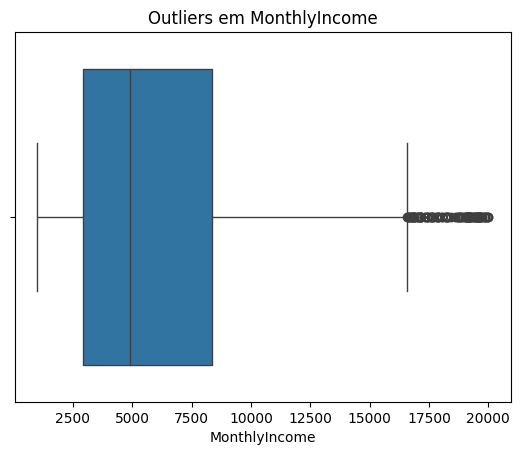

In [10]:
sns.boxplot(x=df_filtered['MonthlyIncome'])
plt.title('Outliers em MonthlyIncome')

In [11]:
Q1 = df_filtered['MonthlyIncome'].quantile(0.25)
Q3 = df_filtered['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
lim_inferior = Q1 - 1.5 * IQR
lim_superior = Q3 + 1.5 * IQR

In [13]:
outliers_income = df[(df['MonthlyIncome'] < lim_inferior)
                    | (df['MonthlyIncome'] > lim_superior)]

In [18]:
outliers_income['EmployeeNumber'].count() # 114 dados extremos

np.int64(114)

In [19]:
# Cargos dos funcionários que apresentam salários muito diversos
cargos_com_outliers = outliers_income['JobRole'].value_counts()
cargos_com_outliers

JobRole
Manager              74
Research Director    40
Name: count, dtype: int64

<Axes: xlabel='YearsAtCompany'>

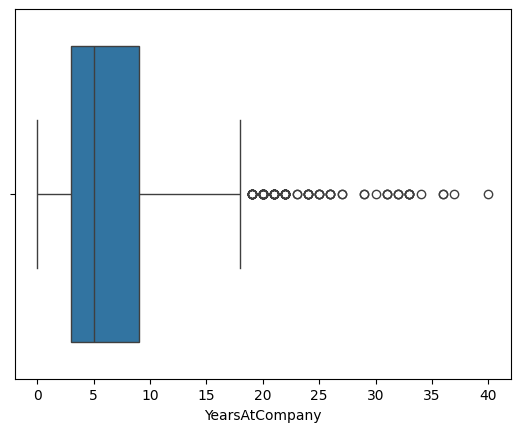

In [20]:
sns.boxplot(x=df_filtered['YearsAtCompany'])

<Axes: xlabel='YearsInCurrentRole'>

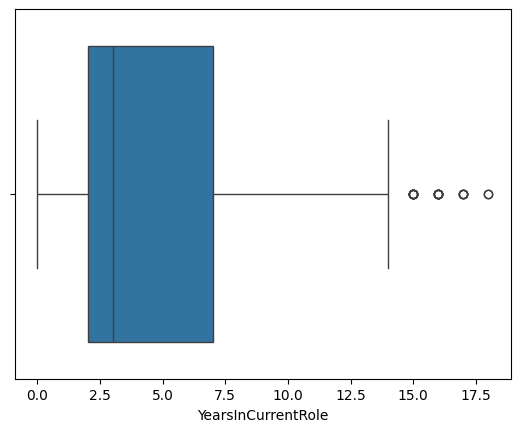

In [21]:
sns.boxplot(x=df_filtered['YearsInCurrentRole'])

<Axes: xlabel='YearsWithCurrManager'>

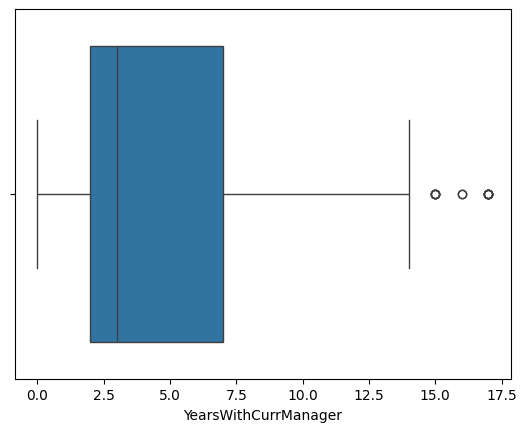

In [22]:
sns.boxplot(x=df_filtered['YearsWithCurrManager'])

In [15]:
df_filtered.to_pickle('dados/df_filtrado.pkl')

**Considerações Finais das etapas de leitura e tratamento**

Não foi necessário lidar com valores nulos ou tipo de dados. Apenas houve o filtro das colunas relevantes para a análise posterior.

Os outliers presentes no salário mensal não são derivados de erros, pois os cargos dos respectivos funcionários estão de acordo com as funções. Outliers nas demais colunas também não foram considerados como problemas.